# Working with SVM's in SciKit Learn

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import matplotlib
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd), ("Matplotlib",matplotlib))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.14.1
Pandas Version: 0.20.3
Matplotlib Version: 2.0.2


In [3]:
def scatter_plot(X, y):
    num_classes = len(np.unique(y))
    plt.figure(dpi=150)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.jet)
    plt.xlabel("X_0")
    plt.ylabel("X_1")
    return plt.gca()

In [4]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, X, y, **params):
    """
    Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Linearly Seperable Data

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=20)

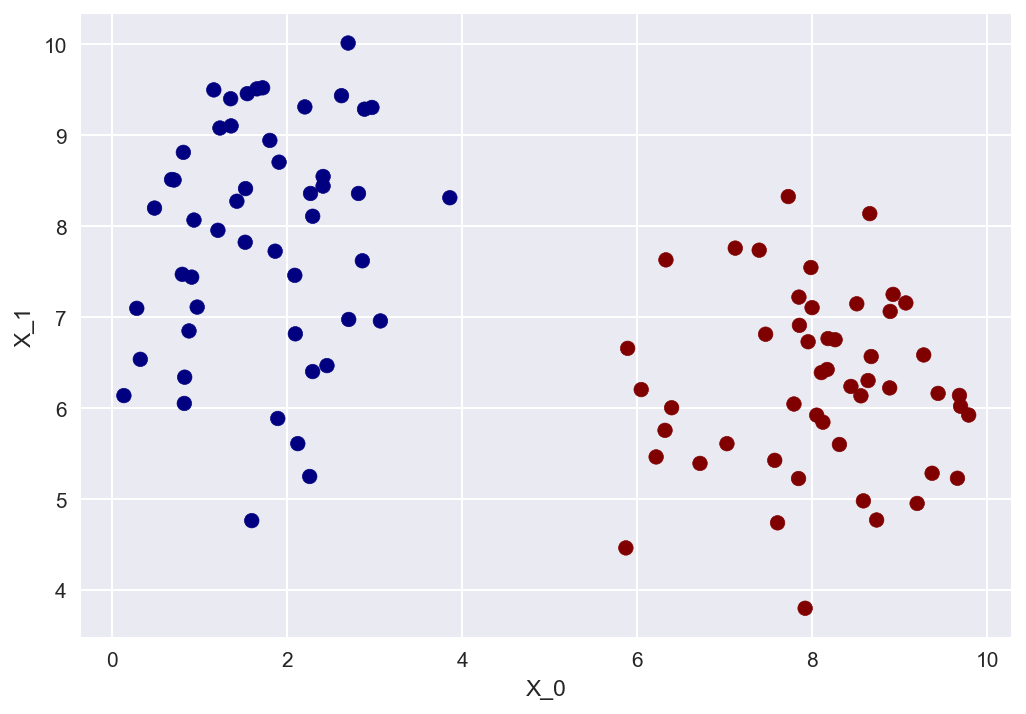

In [6]:
scatter_plot(X,y)

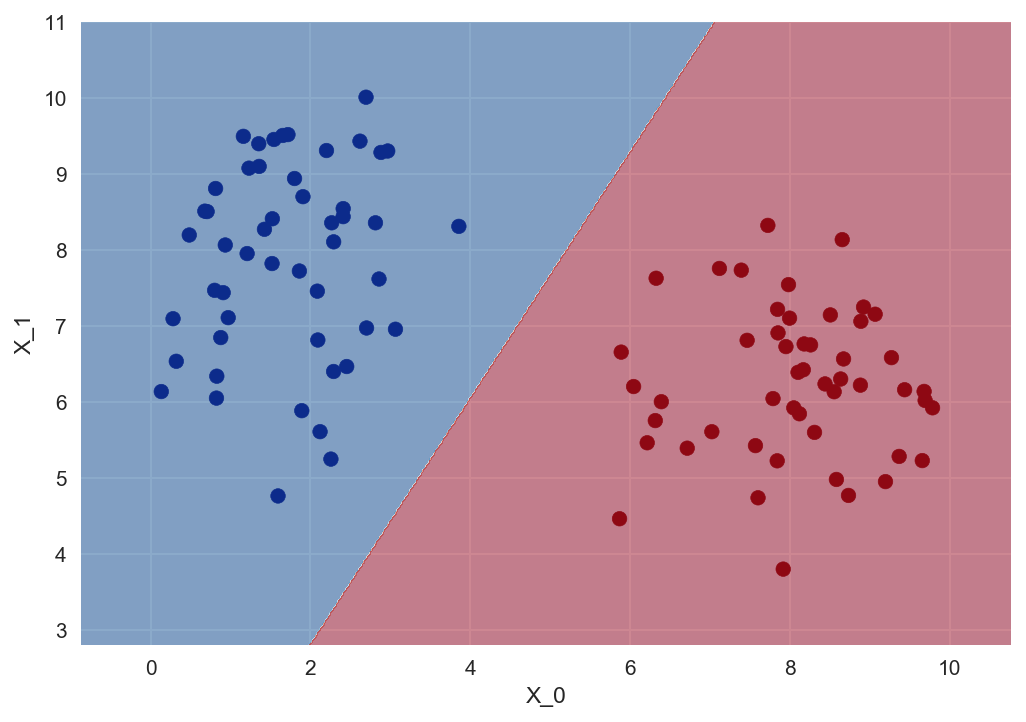

In [7]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X,y)

ax = scatter_plot(X,y)
plot_contours(ax, svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);

# Linear, but overlapping

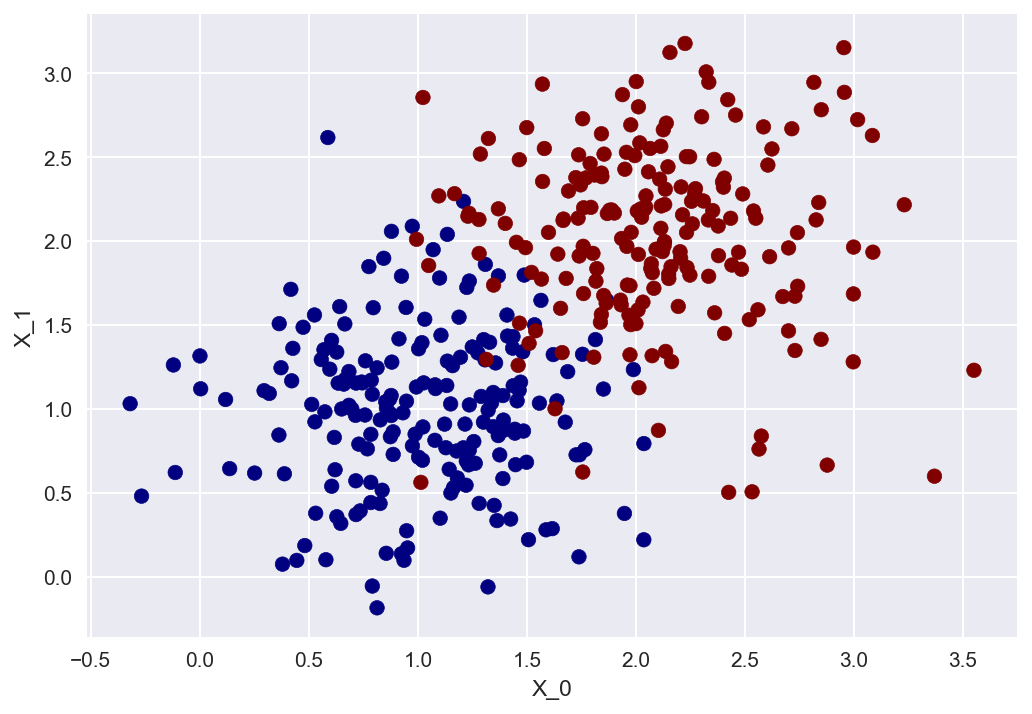

In [8]:
def make_overlapping_blobs(n_points=100):
    set1 = np.random.normal(1,0.5,size=(n_points,2))
    set2 = np.random.normal(2,0.5,size=(n_points,2))
    X = np.vstack((set1,set2))
    y = np.array([0]*n_points + [1]*n_points).ravel()
    return X, y

X, y = make_overlapping_blobs(200)
scatter_plot(X,y);

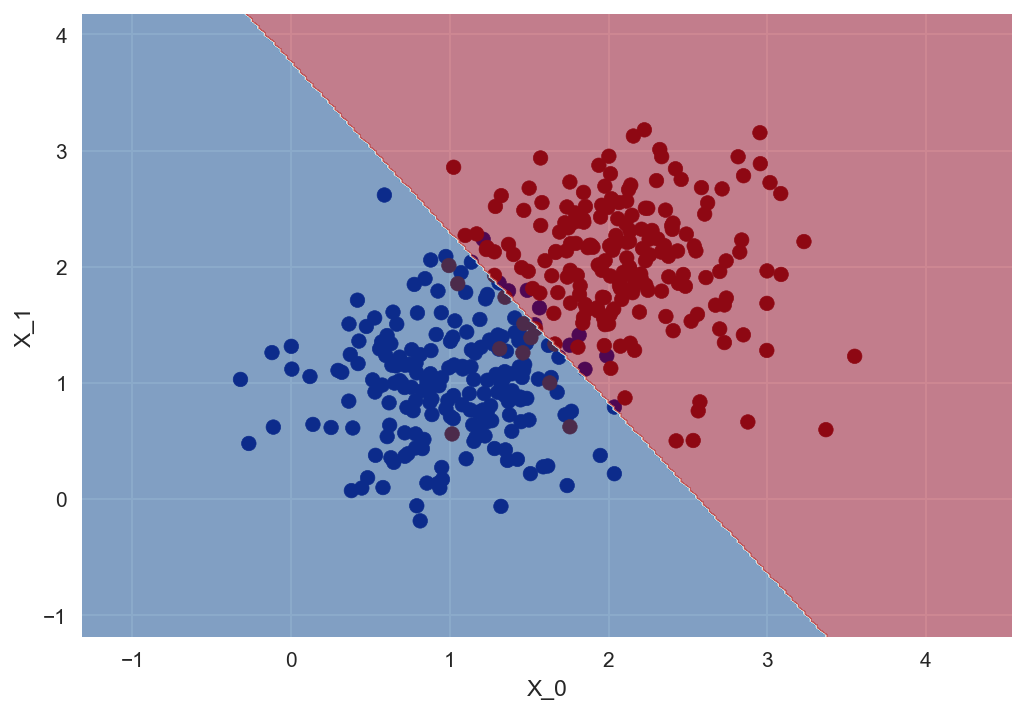

In [9]:
svc = LinearSVC(C=5)
svc.fit(X,y)

ax = scatter_plot(X,y)
plot_contours(ax, svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.linspace(1e-7,1e2,11)}
grid = GridSearchCV(LinearSVC(), param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.e-07, 1.e+01, 2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01,
       8.e+01, 9.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [11]:
grid.grid_scores_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.50000, std: 0.00000, params: {'C': 1e-07},
 mean: 0.94250, std: 0.01500, params: {'C': 10.00000009},
 mean: 0.94500, std: 0.01696, params: {'C': 20.000000080000003},
 mean: 0.94250, std: 0.01500, params: {'C': 30.000000070000006},
 mean: 0.94000, std: 0.02151, params: {'C': 40.000000060000005},
 mean: 0.93500, std: 0.01658, params: {'C': 50.000000050000004},
 mean: 0.94750, std: 0.01225, params: {'C': 60.00000004000001},
 mean: 0.94750, std: 0.01837, params: {'C': 70.00000003},
 mean: 0.93250, std: 0.02318, params: {'C': 80.00000002},
 mean: 0.93500, std: 0.02550, params: {'C': 90.00000001000001},
 mean: 0.93500, std: 0.01225, params: {'C': 100.0}]

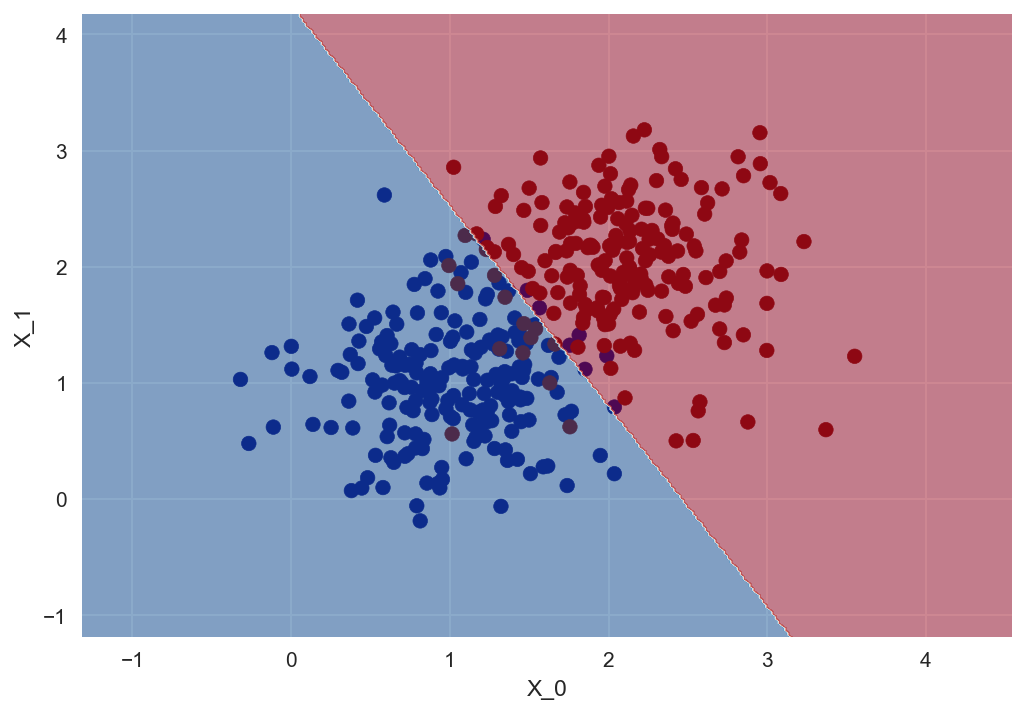

In [12]:
svc = grid.best_estimator_
ax = scatter_plot(X,y)
plot_contours(ax, svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);

# What if we try with a kernel?

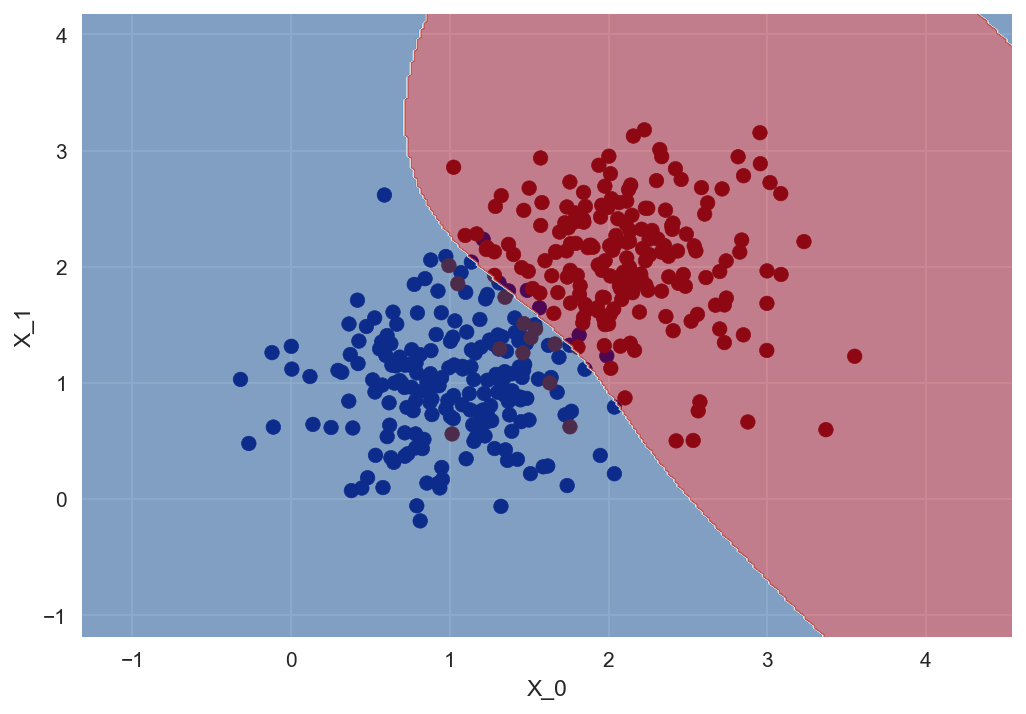

In [13]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=5)
svc.fit(X,y)
ax = scatter_plot(X,y)
plot_contours(ax, svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);

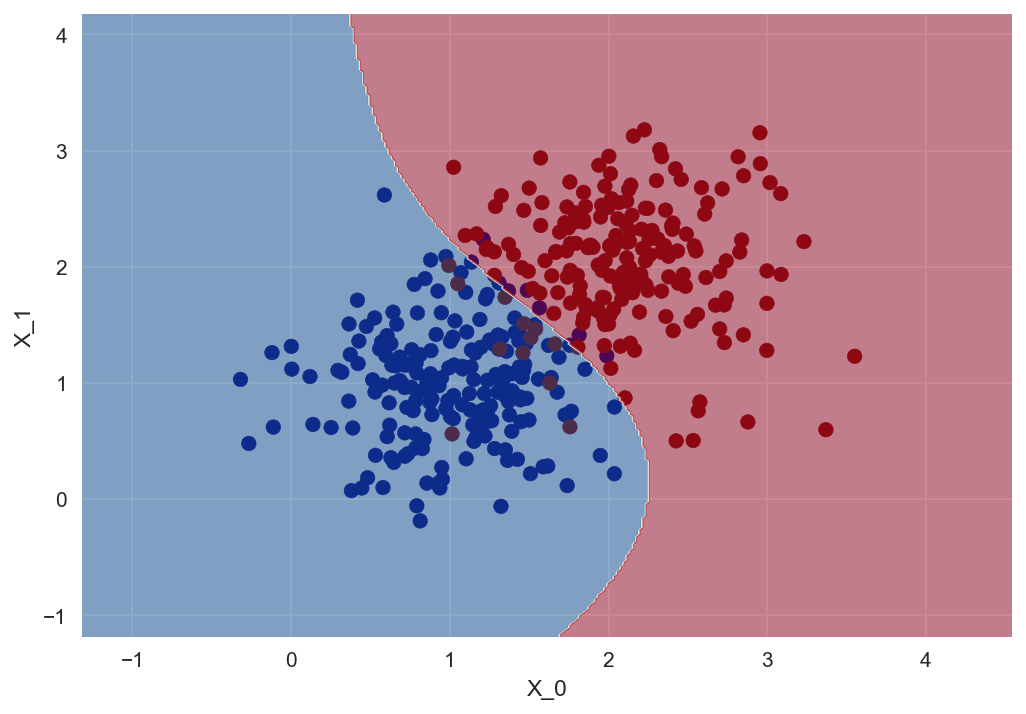

In [14]:
svc = SVC(kernel='poly', C=5)
svc.fit(X,y)
ax = scatter_plot(X,y)
plot_contours(ax, svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);

# What about things that don't really have a "border" that's even close to linear?

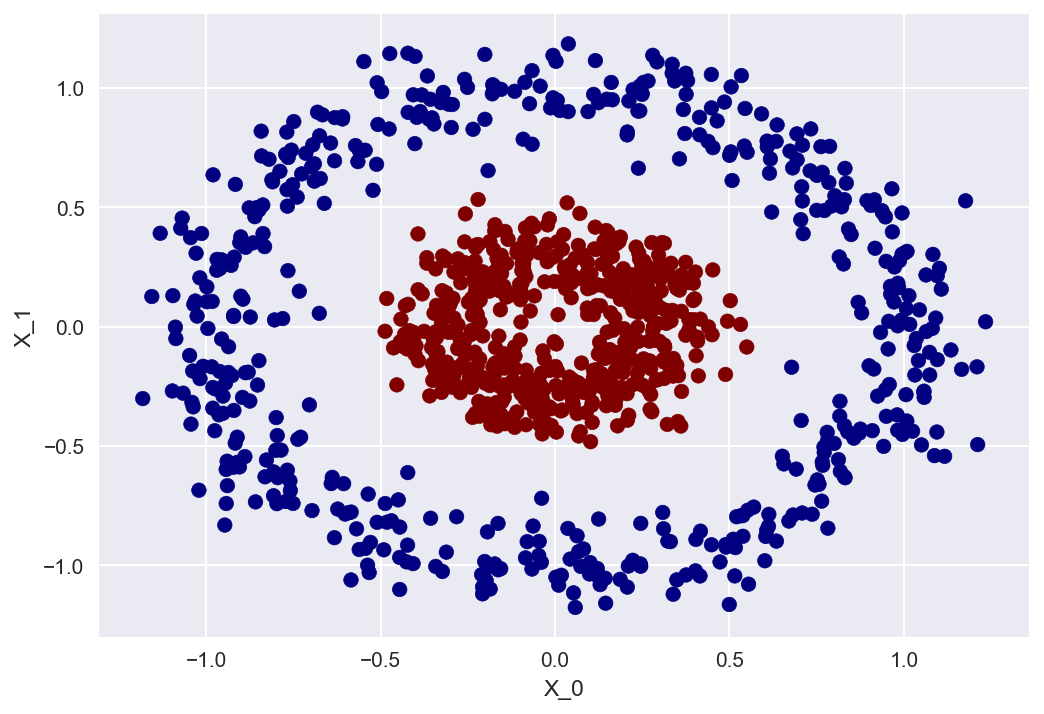

In [15]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)
scatter_plot(X,y)

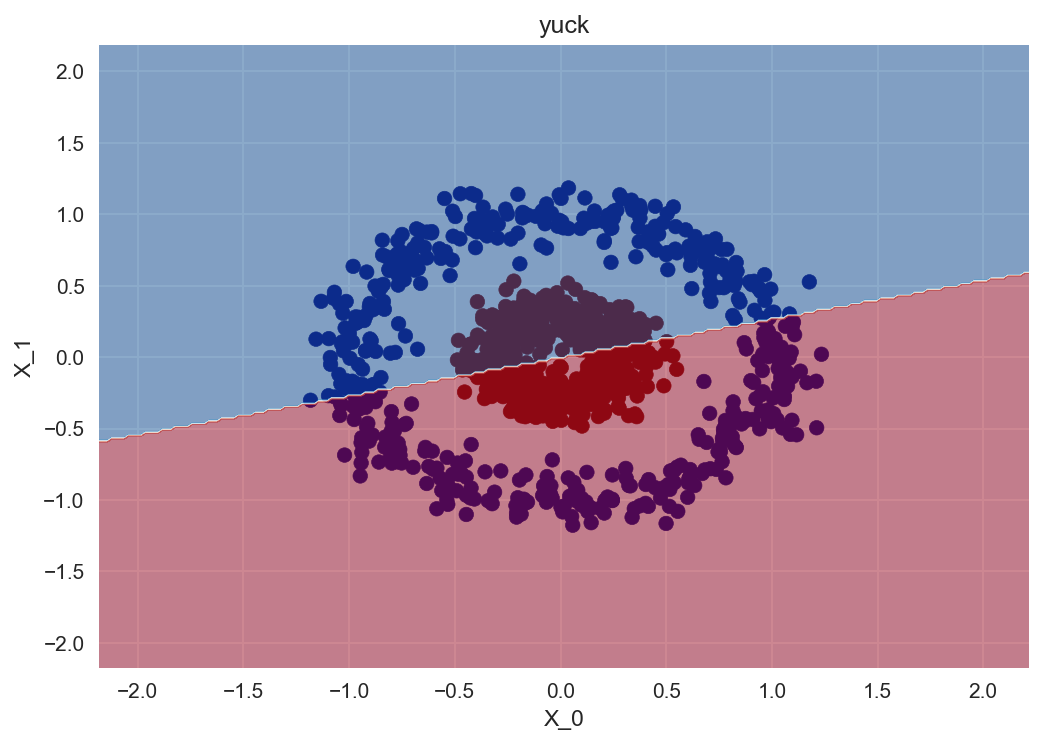

In [16]:
lin_svc = LinearSVC()
lin_svc.fit(X,y)
ax = scatter_plot(X,y)
plot_contours(ax, lin_svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);
plt.title("yuck");

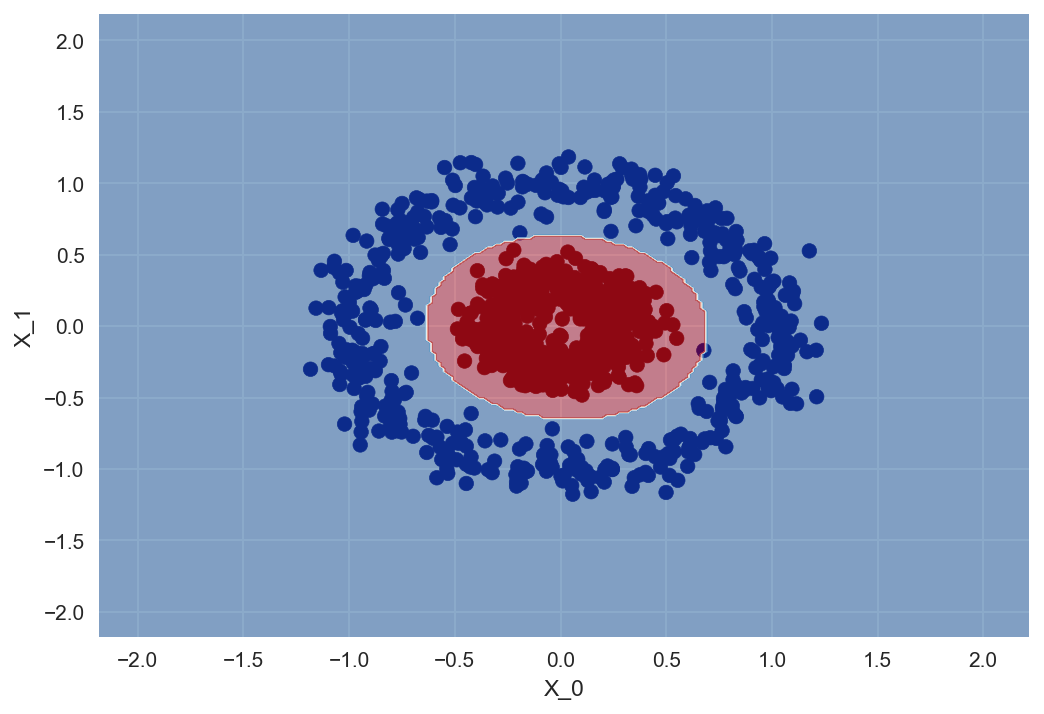

In [17]:
svc = SVC(kernel='rbf', C=5)
svc.fit(X,y)
ax = scatter_plot(X,y)
plot_contours(ax, svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);

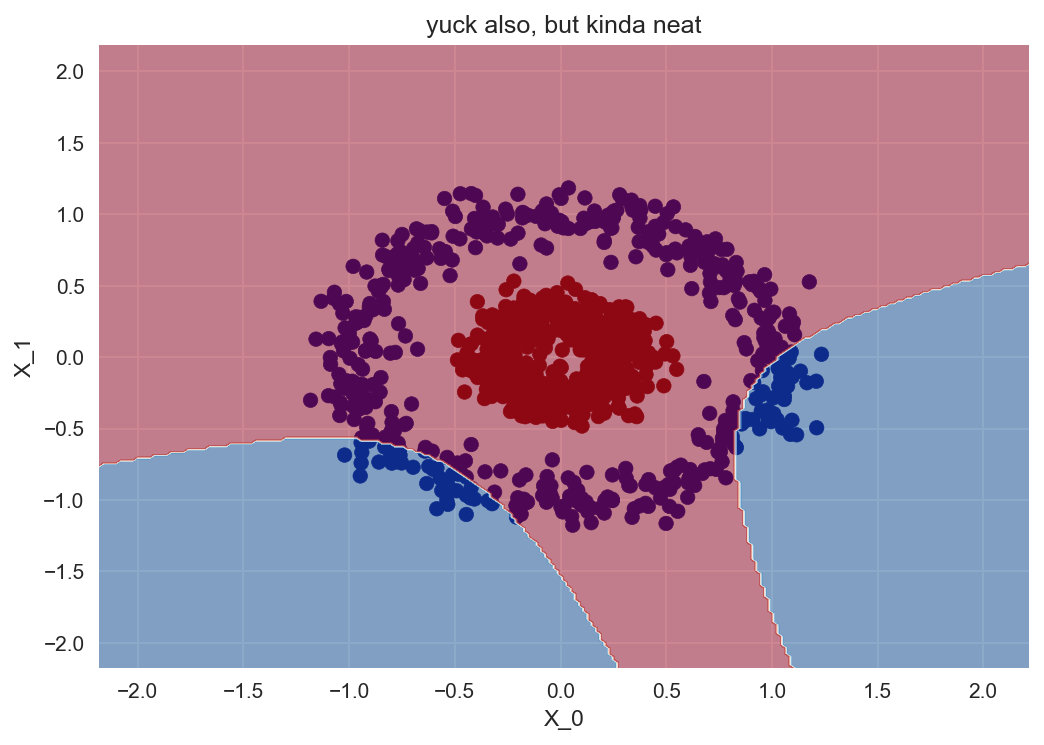

In [18]:
svc = SVC(kernel='poly', C=5)
svc.fit(X,y)
ax = scatter_plot(X,y)
plot_contours(ax, svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);
plt.title("yuck also, but kinda neat")

# What about gamma?

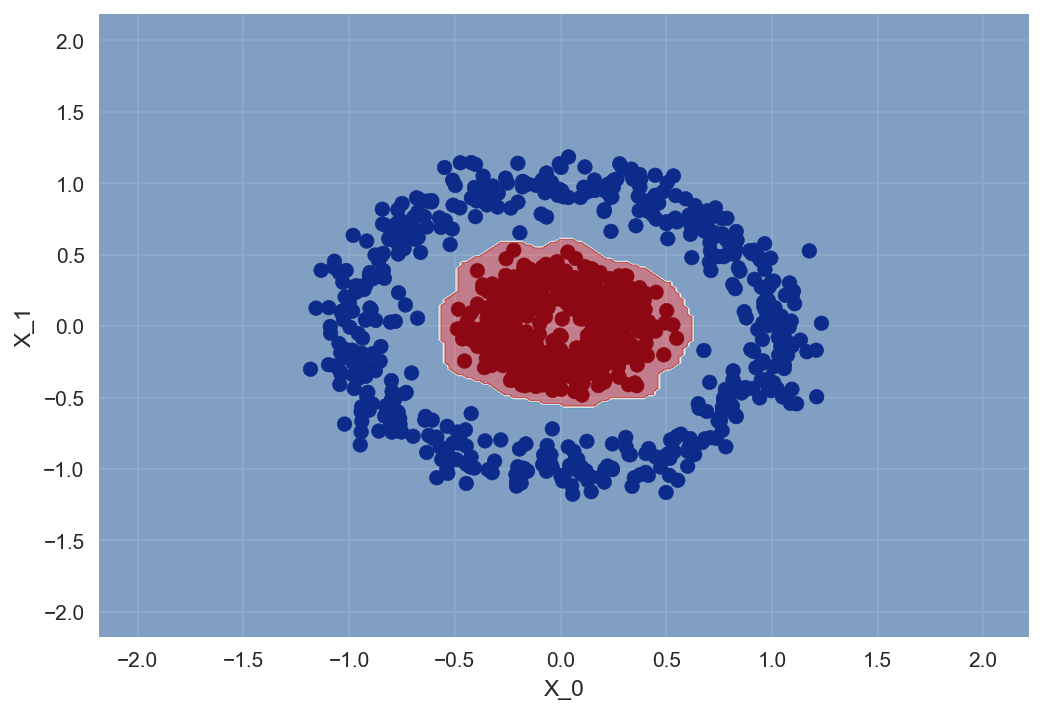

In [19]:
svc = SVC(kernel='rbf', C=5, gamma=1e2)
svc.fit(X,y)
ax = scatter_plot(X,y)
plot_contours(ax, svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);

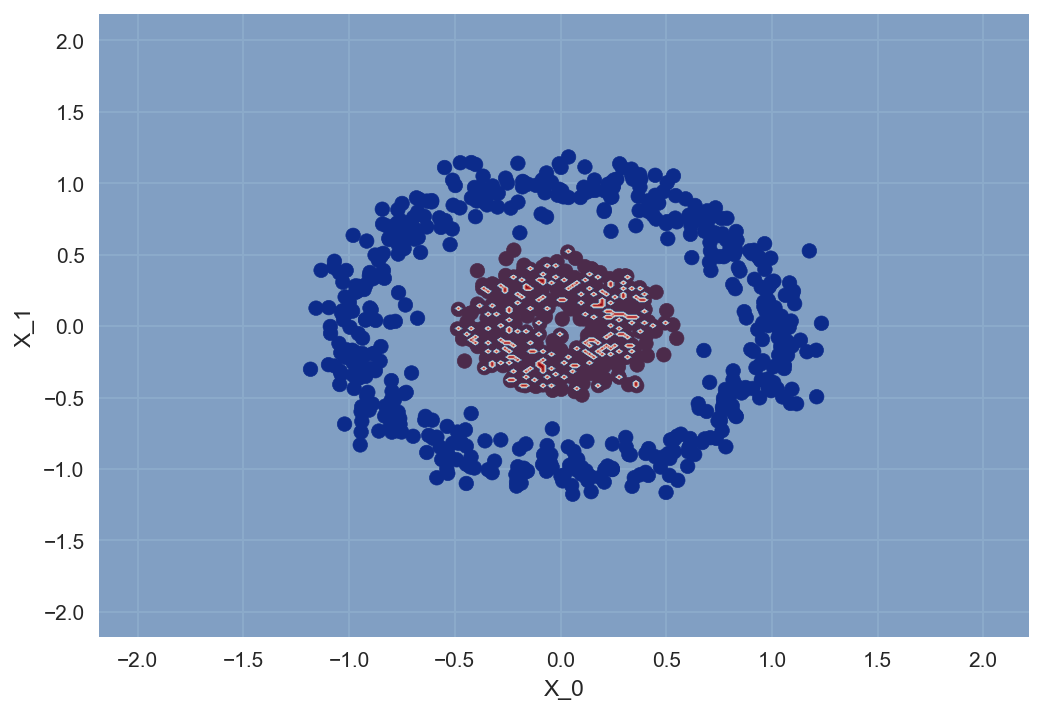

In [20]:
svc = SVC(kernel='rbf', C=5, gamma=1e5)
svc.fit(X,y)
ax = scatter_plot(X,y)
plot_contours(ax, svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);

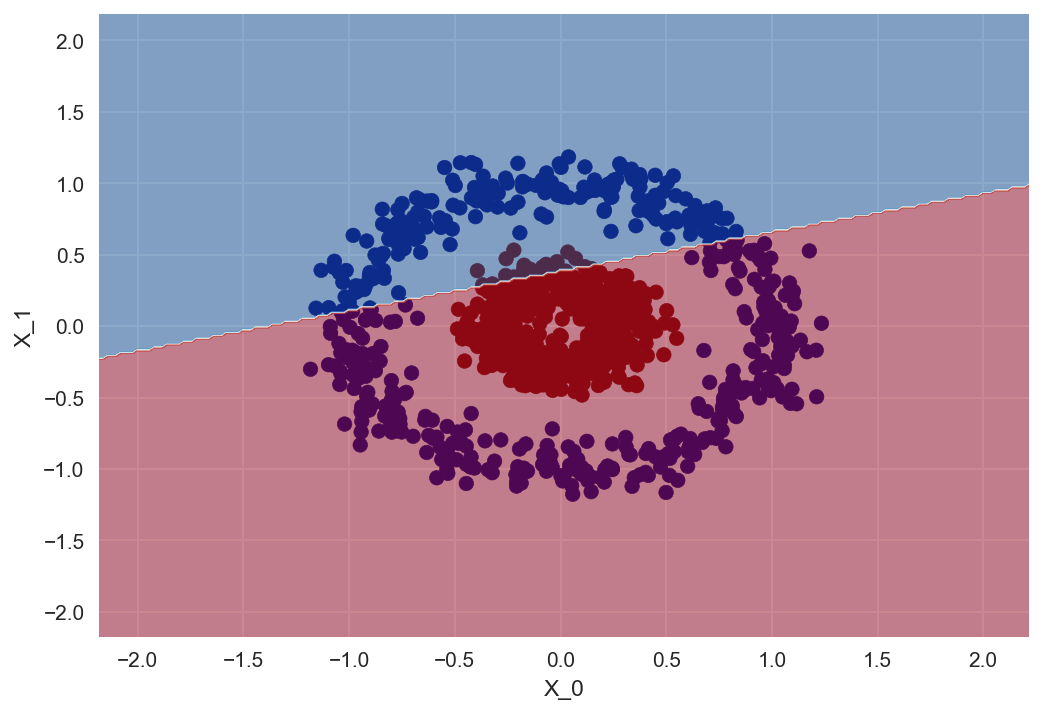

In [21]:
svc = SVC(kernel='rbf', C=5, gamma=1e-5)
svc.fit(X,y)
ax = scatter_plot(X,y)
plot_contours(ax, svc, X, y, cmap=plt.cm.RdBu_r, alpha=0.5);

# So there's a LinearSVC and an SVC(kernel='linear'), what do?

In [22]:
data = np.random.binomial(1, 0.5, size=(500000,101))
X = data[:,1:]
y = data[:,0]

In [23]:
# lin_svc = LinearSVC(loss='squared_hinge', tol=0.001)
# svc_w_lin = SVC(kernel='linear', tol=0.001)

In [24]:
# %time lin_svc.fit(X,y)

In [25]:
# %time svc_w_lin.fit(X,y)

**Stopped after 28 minutes! It just never converged. That's because the library under the hood is very different from the one in LinearSVC (libLinear vs libSVM). On data that's not easily separable, libSVM can really struggle at scale.**